# Problem 1 Assignment 3

In this notebook we perform an empirial analysis of the expected heigh of a tree built from a random permutation such that the in-order traversal realizes the permuation and it has the tree has the heap property.


## Setting things up

In [2]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import math

def random_instance(n):
    """ creates random instance of size n """

    instance = list(range(n))
    random.shuffle(instance)

    return instance


def mean_value(instance_generator, function, num_runs = 100):
    """ run function num_runs times on generated instances, return the mean of the returned values """

    ans = 0
    for _ in range(num_runs):
        ans += function(instance_generator())

    return ans / num_runs


In [3]:
def height(A):
    """ find height of tree induced by A"""

    def height_subarray(i , j):
        """ find height of tree induced by A[i:j]"""

        if i == j:
            return 0
        
        smallest = min(range(i, j), key=lambda x: A[x])

        return 1 + max(height_subarray(i, smallest), height_subarray(smallest + 1, j))

    return height_subarray(0, len(A))

## Expected value optimal strategy

Let $H(n)$ be the expected height of the tree induced by a random permulation of order $n$.

In [4]:
sizes = [ 2**i for i in range(2, 20)]
H = [ mean_value(lambda : random_instance(size), height) for size in sizes ]

Let us plot $H(n)$ on a log-scale for the x-axis. If there is a linear dependency, then probably $T(n) = \Theta(\log n)$.

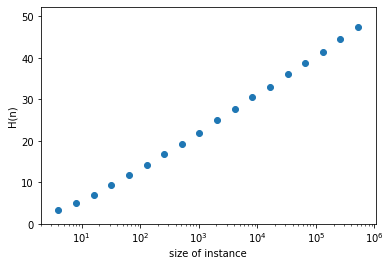

In [5]:
fig = plt.scatter(sizes, H)
plt.xscale('log')
plt.xlabel('size of instance')
plt.ylabel('H(n)')
plt.ylim(0, max(H) + 5)
plt.xlim((min(sizes) / 2 , 2 * max(sizes)))
plt.savefig('tree-height-logplot.pdf')

It looks like there is a strong linear dependency between $H(n)$ and $\log n$. To confirm our guess, we can plot $H(n) / \ln n$.

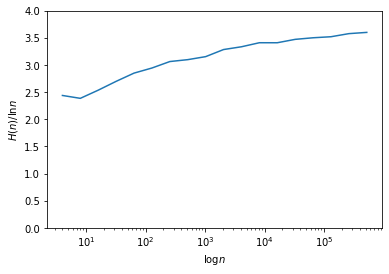

In [6]:
guess = lambda n: math.log(n)
ratios =[H_n / guess(n) for (n, H_n) in zip(sizes, H)]
plt.xlabel('$\log n$')
plt.xscale('log')
plt.ylim(0, int(max(ratios)) + 1)
plt.ylabel('$H(n) / \ln n$')
plt.plot(sizes, ratios)
plt.savefig('tree-height-guess.pdf')

The plot seems to support our hypothesis. Although one would have to try higher values of $n$ to work out exactly the constant in front of the $\ln n$ term.